In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pycocotools.coco import COCO
import skimage.io as io
import cv2



In [58]:
coco = COCO("./dataset/LE_cand1_largebox_coco/annotations.json")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [59]:
# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)


In [60]:
catIDs, cats

([0, 1, 2],
 [{'supercategory': None, 'id': 0, 'name': '_background_'},
  {'supercategory': None, 'id': 1, 'name': 'LE'},
  {'supercategory': None, 'id': 2, 'name': 'star'}])

In [61]:
img_id = 0
ann_ids = coco.getAnnIds(imgIds=img_id)
ann_info = coco.loadAnns(ann_ids)

In [8]:
ann_info

[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'segmentation': [[180.33333333333331,
    419.9607843137255,
    208.76470588235293,
    407.21568627450984,
    275.7570911859892,
    403.7770797639444,
    293.2328193413292,
    415.42756520083753,
    272.84446982676604,
    424.16542927850753,
    216.6078431372549,
    425.843137254902]],
  'area': 1732.0,
  'bbox': [180.0, 403.0, 114.0, 23.0],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 0,
  'category_id': 1,
  'segmentation': [[266.0388349514563,
    326.126213592233,
    284.4854368932039,
    311.5631067961165,
    308.75728155339806,
    304.7669902912621,
    333.02912621359224,
    304.7669902912621,
    340.79611650485435,
    311.5631067961165,
    328.1747572815534,
    318.3592233009709,
    303.90291262135923,
    329.0388349514563,
    288.36893203883494,
    330.9805825242718,
    274.7766990291262,
    332.92233009708735]],
  'area': 1246.0,
  'bbox': [266.0, 304.0, 75.0, 29.0],
  'iscrowd': 0},
 {'id': 2,
  'image_i

In [15]:
mask = coco.annToMask(ann_info[1])

In [16]:
mask.shape

(576, 576)

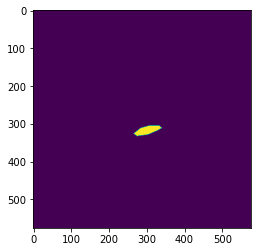

In [17]:
plt.imshow(mask)

In [54]:
import json
#Find JSON that gives errors
JSON_LOC="./dataset/LE_cand1_largebox_coco/annotations.json"

#Open JSON
val_json = open(JSON_LOC, "r")
json_object = json.load(val_json)
val_json.close()

for i, instance in enumerate(json_object["annotations"]):
    segpoints = instance["segmentation"][0]
    if len(segpoints) == 4:
        #print("instance number", i, "raises error:", instance["segmentation"][0])
        
        #Alter object generating the error with something random not causing the error
        json_object["annotations"][i]["segmentation"] = [ segpoints + [segpoints[0]] ]


In [57]:
#Write back altered JSON
val_json = open(JSON_LOC, "w")
json.dump(json_object, val_json)
val_json.close()

In [37]:
ann_info[3]

{'id': 3,
 'image_id': 0,
 'category_id': 2,
 'segmentation': [[318.4660194174757,
   376.6116504854369,
   272.83495145631065,
   445.54368932038835,
   315.5533980582524,
   528.0679611650486,
   366.0388349514563,
   443.6019417475728]],
 'area': 7294.0,
 'bbox': [272.0, 376.0, 95.0, 153.0],
 'iscrowd': 0}

In [66]:
ann_info[1]

{'id': 1,
 'image_id': 0,
 'category_id': 1,
 'segmentation': [[266.0388349514563,
   326.126213592233,
   284.4854368932039,
   311.5631067961165,
   308.75728155339806,
   304.7669902912621,
   333.02912621359224,
   304.7669902912621,
   340.79611650485435,
   311.5631067961165,
   328.1747572815534,
   318.3592233009709,
   303.90291262135923,
   329.0388349514563,
   288.36893203883494,
   330.9805825242718,
   274.7766990291262,
   332.92233009708735]],
 'area': 1246.0,
 'bbox': [266.0, 304.0, 75.0, 29.0],
 'iscrowd': 0}

In [62]:
ann_info[4]

{'id': 4,
 'image_id': 0,
 'category_id': 2,
 'segmentation': [[521.3786407766991,
   347.4854368932039,
   532.0582524271845,
   363.99029126213594,
   521.3786407766991]],
 'area': 1313.0,
 'bbox': [501.0, 327.0, 41.0, 41.0],
 'iscrowd': 0}

In [63]:
coco.annToMask ( ann_info[4] )

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

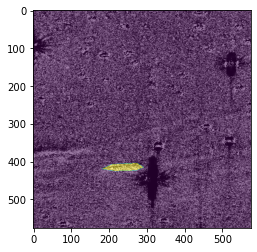

In [87]:
mask = coco.annToMask(ann_info[0])
#for ann in ann_info[1:]:
    #mask = np.maximum( mask, coco.annToMask(ann))
#    mask += coco.annToMask(ann)
    
#plt.imshow()
plt.imshow(imgarr)
plt.imshow(mask, alpha=0.5)



In [88]:
np.unique(mask)

array([0, 1], dtype=uint8)

In [76]:
coco.loadImgs(0)

[{'license': 0,
  'url': None,
  'file_name': 'JPEGImages/005_8.jpg',
  'height': 576,
  'width': 576,
  'date_captured': None,
  'id': 0}]

In [78]:
imgarr = io.imread("./dataset/LE_cand1_largebox_coco/JPEGImages/005_8.jpg")

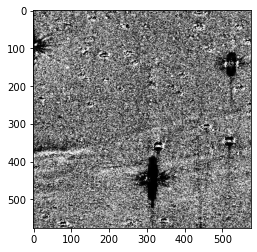

In [80]:
plt.imshow(imgarr)

In [72]:
np.unique(mask)

array([0, 1, 2], dtype=uint8)

In [93]:
import albumentations as A
import random

In [ ]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)

mask = np.zeros_like(img)
for i, ann in enumerate(annIds):
    mask += coco.annToMask(ann) * i 


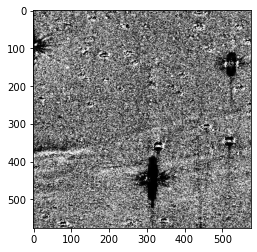

In [91]:
plt.imshow(imgarr)

In [96]:
imgarr.min(), imgarr.max()

(0, 255)

In [104]:
image = imgarr/225-0.5

In [105]:
image.min(), image.max()

(-0.5, 0.6333333333333333)

In [ ]:
plt.hist()

In [101]:
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=)['image']


In [102]:
augmented_image.min(), augmented_image.max()

(-0.5, 0.6333333333333333)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


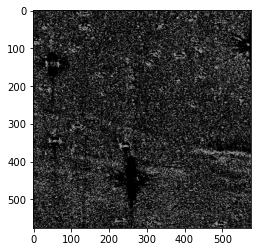

In [103]:
plt.imshow(augmented_image)